# Logistic Regression

A classic method for binary classification tasks. We will build our own version here, and visualize the model results.

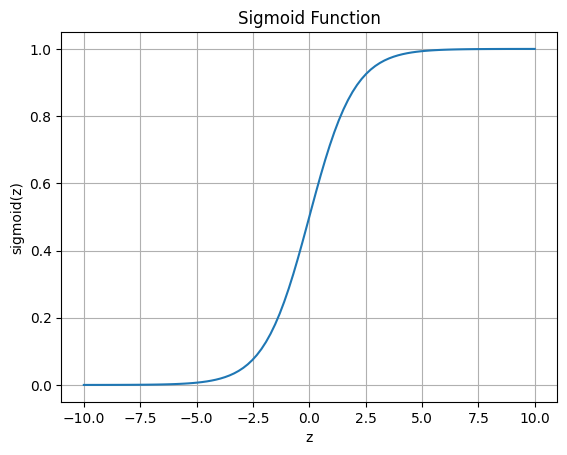

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#sigmoid function
def sigmoid(z: np.ndarray) -> np.ndarray:
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

#plot it out
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

For logistic regression, the cost function (also called log loss) for all training samples is:

$$ J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [ y^{(i)} \log(\sigma(\theta^T x^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(\theta^T x^{(i)})) ] $$

Where:
- $m$ is the number of training examples
- $y^{(i)}$ is the actual class label of the i-th training example
- $x^{(i)}$ is the feature vector of the i-th training example
- $\theta$ is the vector of weights
- $\sigma$ is the sigmoid function

The gradient of the cost function with respect to the j-th parameter is given by:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (\sigma(\theta^T x^{(i)}) - y^{(i)}) x^{(i)}_j $$

In [2]:
def loss_function(x: np.ndarray, y: np.ndarray, theta: np.ndarray) -> float:
    predictions = sigmoid(np.dot(x,theta))
    epsilon = 1e-5
    predictions = np.clip(predictions, epsilon, 1 - epsilon) #clip values to avoid taking log(0)
    error = np.mean((-y * np.log(predictions)) - ((1-y)*np.log(1-predictions)))
    return error

def gradient(x: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    m = y.shape[0]
    predictions = sigmoid(np.dot(x, theta))
    return 1/m * np.dot(x.T, (predictions - y))

Load in an example dataset for binary classification

(569, 30) (569,)


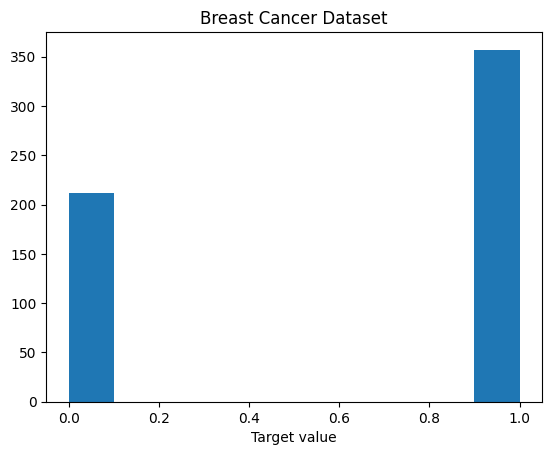

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
x = data['data']
y = data['target']

print(x.shape, y.shape)

plt.title('Breast Cancer Dataset')
plt.xlabel('Target value')
plt.hist(y);

Define the gradient descent function, and learn parameters

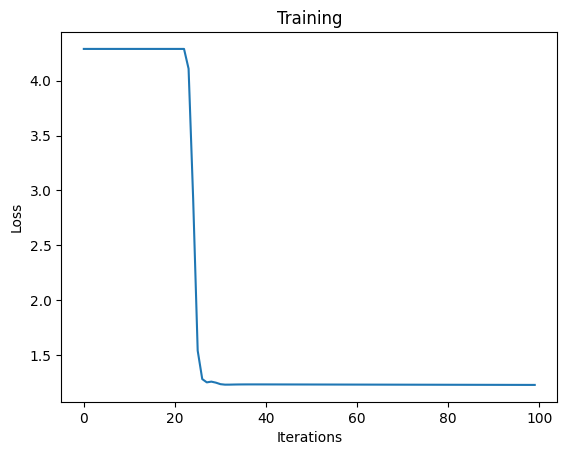

In [20]:
def gradient_descent(x: np.ndarray, y: np.ndarray, theta: np.ndarray, learning_rate: float, num_iterations: int) -> np.ndarray:
    loss_history = np.zeros(num_iterations)
    for i in range(num_iterations):
        theta = theta - learning_rate * gradient(x, y, theta)
        loss_history[i] = loss_function(x, y, theta)
    plt.title("Training")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.plot(loss_history)
    return theta

theta = np.ones(x.shape[1])
theta = gradient_descent(x, y, theta, 0.0001, 100)

Visualize the model's output in a variety of methods

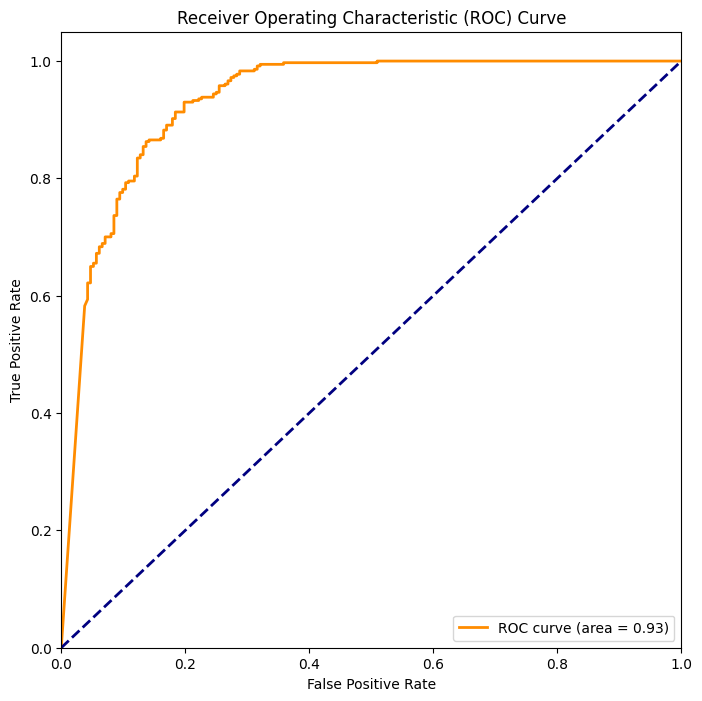

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_scores = sigmoid(np.dot(x, theta))

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

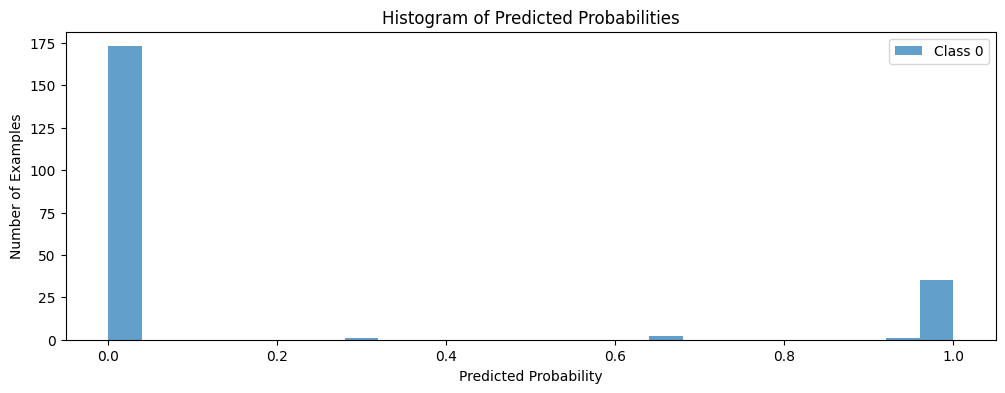

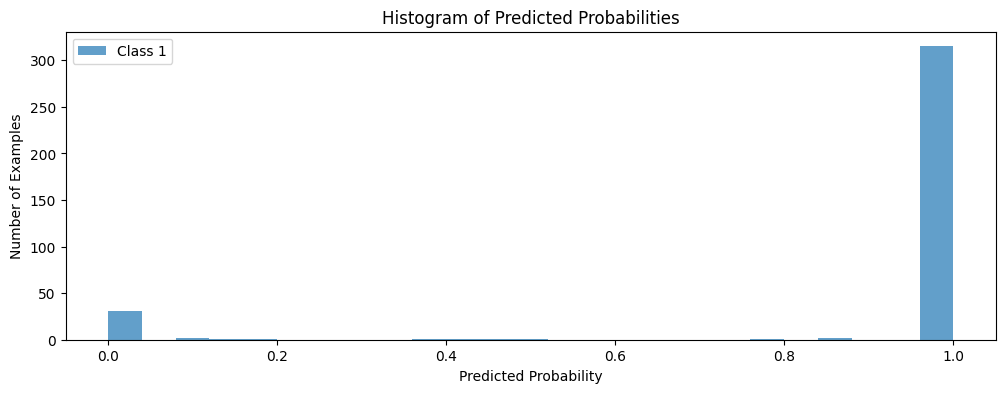

In [34]:
probs = sigmoid(np.dot(x, theta))

# Plot
plt.figure(figsize=(12, 4))
plt.hist(probs[y==0], bins=25, label='Class 0', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Number of Examples')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()


plt.figure(figsize=(12, 4))
plt.hist(probs[y==1], bins=25, label='Class 1', alpha=0.7)
plt.xlabel('Predicted Probability')
plt.ylabel('Number of Examples')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

In what way can the output of a logistic regression model be interpreted as probabilities?

Answer: In practice, it learns to empirically split the data. Because it squashes the model output between 0 and 1, it seems like probabilities. However, it is not guaranteed to model accurately calibrated probabilities. So in practice, yes, but theoretically, not necessarily.

Resources: https://www.quora.com/Why-is-the-output-of-logistic-regression-interpreted-as-a-probability

Chat GPT answer:

Yes, the output of a logistic regression model can be interpreted as probabilities, but with some nuances.

**Why it can be interpreted as probabilities**:

1. **Range**: The logistic function (or sigmoid function) used in logistic regression squashes the output of any real-valued number to lie in the range (0, 1), which is the range of probabilities.

2. **Interpretation**: The logistic regression model estimates the probability that a given instance belongs to a particular category. Specifically, in binary logistic regression, it estimates \( P(Y=1|X) \), the probability that the dependent variable \( Y \) is 1 given the values of the independent variables \( X \).

3. **Odds Ratio**: The coefficients in logistic regression can be related to the odds ratio, which gives us insight into how the probability changes as the independent variables change.

**Caveats and Nuances**:

1. **Assumptions**: Logistic regression assumes a linear relationship between the log-odds of the dependent variable and the independent variables. This means if the true relationship in the underlying data is not of this form, the probabilities generated by the logistic regression might be miscalibrated.

2. **Calibration**: Even though the outputs lie between 0 and 1, it doesn't mean they are well-calibrated probabilities. A model is said to be well-calibrated if, for all instances where it predicts a probability \( p \), approximately a proportion \( p \) of those instances are positive. For example, among all instances where the model predicts a probability of 0.7, 70% should be positive for the model to be well-calibrated. Logistic regression is not guaranteed to produce well-calibrated probabilities out of the box, although in practice, it often does.

3. **Discriminative vs. Generative**: Logistic regression is a discriminative model, meaning it focuses on modeling the decision boundary between classes. Some other models, like Naive Bayes, are generative and model the actual distribution of data in each class. Discriminative models might have better accuracy, but generative models can offer true class probabilities given they model the whole distribution.

In summary, while the output of logistic regression can be interpreted as probabilities, it's essential to check the model's calibration, especially if making decisions based on these probabilities. Calibration plots or other calibration methods can be used to verify and, if necessary, adjust the predicted probabilities to be more accurate.
